# Drilldown Solutions - Business Analytics Dashboard

## Executive Summary
This comprehensive business analytics dashboard provides key insights into Drilldown Solutions' performance across customer lifetime value, product profitability, sales rep performance, and strategic growth opportunities.

### Key Metrics Analyzed:
- **Customer Lifetime Value (LTV)** - Revenue potential per customer
- **Product Profitability** - Performance and margins by product
- **Sales Rep Performance** - Individual and team performance metrics
- **Growth Trends** - Revenue, customer acquisition, and market expansion
- **Customer Segmentation** - Industry sectors, countries, company sizes
- **Payment Analytics** - Overdue invoices and payment timing


In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("📊 Business Analytics Dashboard - Drilldown Solutions")
print("=" * 60)


📊 Business Analytics Dashboard - Drilldown Solutions


## 1. Data Loading and Setup


In [9]:
# Load all datasets
print("Loading datasets...")
companies = pd.read_csv('../dbt/data/companies.csv')
contacts = pd.read_csv('../dbt/data/contacts.csv')
deals = pd.read_csv('../dbt/data/deals.csv')
invoices = pd.read_csv('../dbt/data/invoices.csv')
invoice_lines = pd.read_csv('../dbt/data/invoice_lines.csv')
products = pd.read_csv('../dbt/data/products.csv')

# Convert date columns
deals['created_date'] = pd.to_datetime(deals['created_date'])
deals['close_date'] = pd.to_datetime(deals['close_date'])
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'])
invoices['due_date'] = pd.to_datetime(invoices['due_date'])
invoices['paid_date'] = pd.to_datetime(invoices['paid_date'])
companies['created_date'] = pd.to_datetime(companies['created_date'])
contacts['created_date'] = pd.to_datetime(contacts['created_date'])

print("✅ Data loaded successfully!")
print(f"📈 Dataset Overview:")
print(f"   • Companies: {companies.shape[0]:,} records")
print(f"   • Contacts: {contacts.shape[0]:,} records") 
print(f"   • Deals: {deals.shape[0]:,} records")
print(f"   • Invoices: {invoices.shape[0]:,} records")
print(f"   • Invoice Lines: {invoice_lines.shape[0]:,} records")
print(f"   • Products: {products.shape[0]:,} records")


Loading datasets...
✅ Data loaded successfully!
📈 Dataset Overview:
   • Companies: 100 records
   • Contacts: 100 records
   • Deals: 94 records
   • Invoices: 67 records
   • Invoice Lines: 134 records
   • Products: 8 records


## 2. Key Performance Indicators (KPIs)


📊 Calculating Key Performance Indicators...

📈 Key Performance Indicators:
   💰 Total Revenue: $4,535,500.00
   💼 Total Deal Value: $6,125,000.00
   📊 Average Deal Size: $65,159.57
   🎯 Win Rate: 70.2%
   👥 Total Customers: 100
   ✅ Active Customers: 65
   💵 Avg Revenue per Customer: $69,776.92
   📋 Total Deals: 94 (Won: 66, Lost: 13, Open: 15)


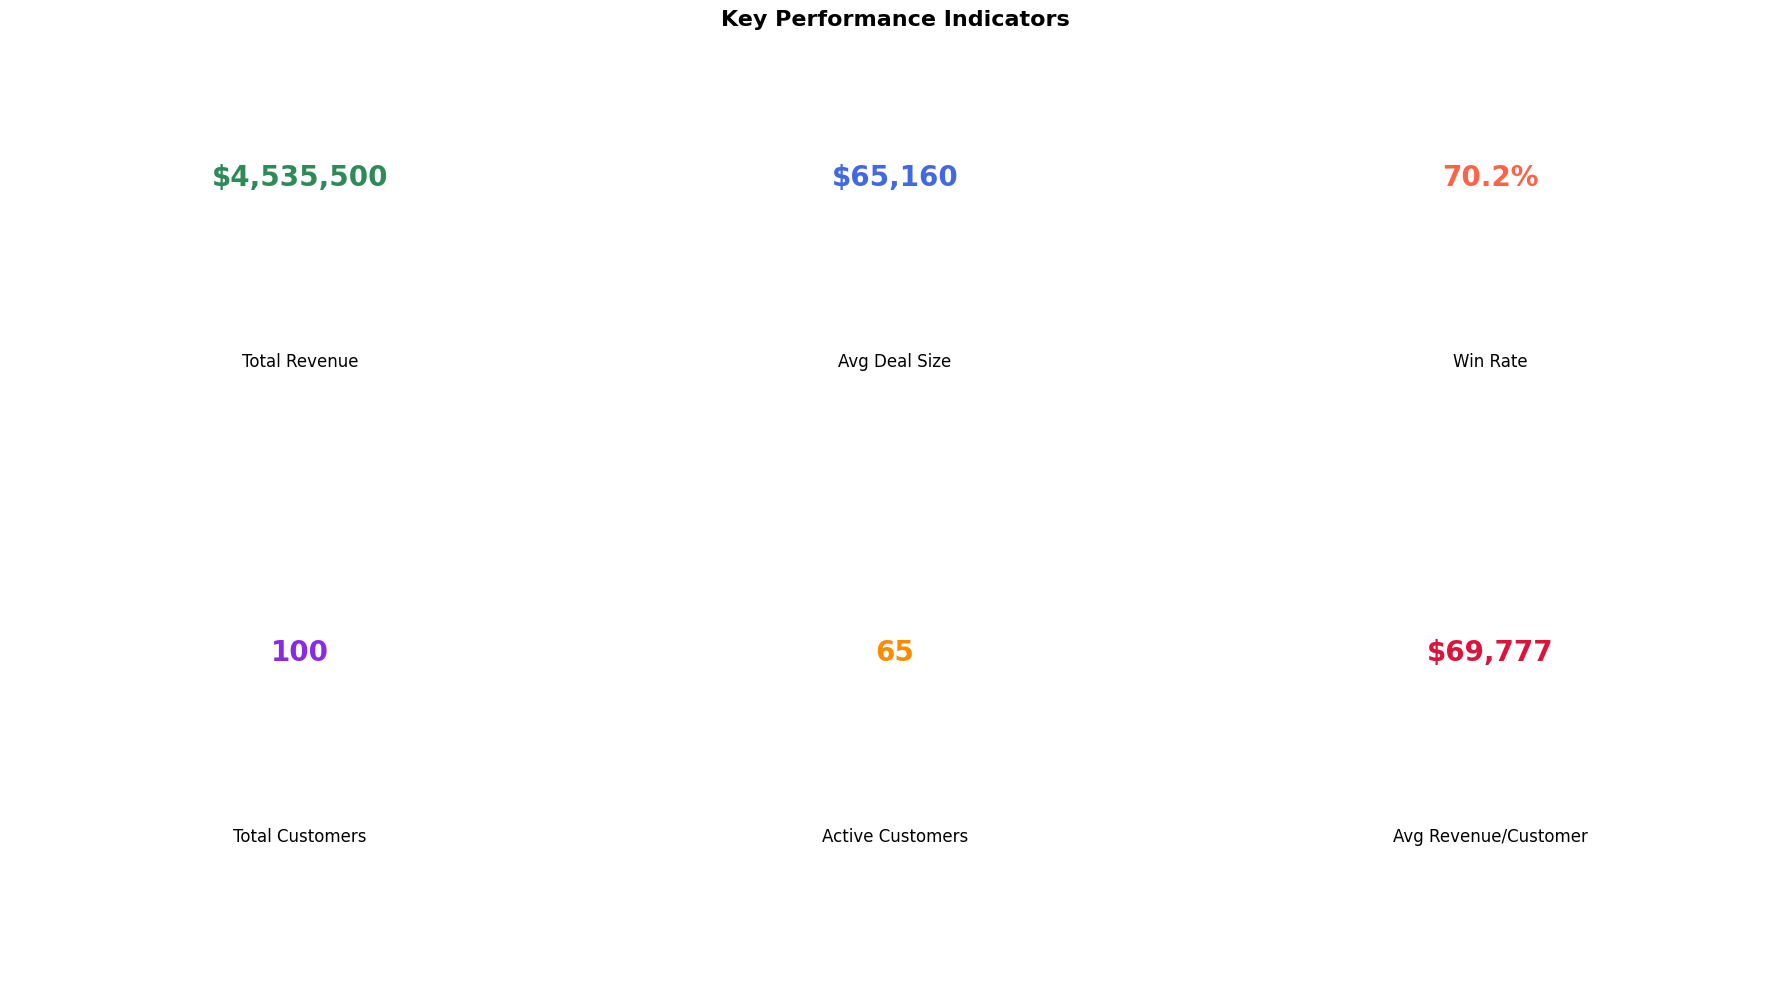

In [10]:
# Calculate key business metrics
print("📊 Calculating Key Performance Indicators...")

# Revenue metrics
total_revenue = invoices['total_amount'].sum()
total_deals_value = deals['amount'].sum()
avg_deal_size = deals['amount'].mean()
conversion_rate = (deals['deal_stage'] == 'Closed Won').mean() * 100

# Customer metrics
total_customers = companies['company_id'].nunique()
active_customers = invoices['company_id'].nunique()
avg_revenue_per_customer = total_revenue / active_customers if active_customers > 0 else 0

# Deal metrics
total_deals = len(deals)
won_deals = len(deals[deals['deal_stage'] == 'Closed Won'])
lost_deals = len(deals[deals['deal_stage'] == 'Closed Lost'])
open_deals = len(deals[~deals['deal_stage'].isin(['Closed Won', 'Closed Lost'])])

# Print KPIs
print(f"\n📈 Key Performance Indicators:")
print(f"   💰 Total Revenue: ${total_revenue:,.2f}")
print(f"   💼 Total Deal Value: ${total_deals_value:,.2f}")
print(f"   📊 Average Deal Size: ${avg_deal_size:,.2f}")
print(f"   🎯 Win Rate: {conversion_rate:.1f}%")
print(f"   👥 Total Customers: {total_customers:,}")
print(f"   ✅ Active Customers: {active_customers:,}")
print(f"   💵 Avg Revenue per Customer: ${avg_revenue_per_customer:,.2f}")
print(f"   📋 Total Deals: {total_deals:,} (Won: {won_deals:,}, Lost: {lost_deals:,}, Open: {open_deals:,})")

# Create KPI visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Key Performance Indicators', fontsize=16, fontweight='bold')

# Revenue KPI
axes[0,0].text(0.5, 0.7, f'${total_revenue:,.0f}', ha='center', va='center', fontsize=20, fontweight='bold', color='#2E8B57')
axes[0,0].text(0.5, 0.3, 'Total Revenue', ha='center', va='center', fontsize=12)
axes[0,0].set_xlim(0, 1)
axes[0,0].set_ylim(0, 1)
axes[0,0].axis('off')

# Average Deal Size
axes[0,1].text(0.5, 0.7, f'${avg_deal_size:,.0f}', ha='center', va='center', fontsize=20, fontweight='bold', color='#4169E1')
axes[0,1].text(0.5, 0.3, 'Avg Deal Size', ha='center', va='center', fontsize=12)
axes[0,1].set_xlim(0, 1)
axes[0,1].set_ylim(0, 1)
axes[0,1].axis('off')

# Conversion Rate
axes[0,2].text(0.5, 0.7, f'{conversion_rate:.1f}%', ha='center', va='center', fontsize=20, fontweight='bold', color='#FF6347')
axes[0,2].text(0.5, 0.3, 'Win Rate', ha='center', va='center', fontsize=12)
axes[0,2].set_xlim(0, 1)
axes[0,2].set_ylim(0, 1)
axes[0,2].axis('off')

# Total Customers
axes[1,0].text(0.5, 0.7, f'{total_customers:,}', ha='center', va='center', fontsize=20, fontweight='bold', color='#8A2BE2')
axes[1,0].text(0.5, 0.3, 'Total Customers', ha='center', va='center', fontsize=12)
axes[1,0].set_xlim(0, 1)
axes[1,0].set_ylim(0, 1)
axes[1,0].axis('off')

# Active Customers
axes[1,1].text(0.5, 0.7, f'{active_customers:,}', ha='center', va='center', fontsize=20, fontweight='bold', color='#FF8C00')
axes[1,1].text(0.5, 0.3, 'Active Customers', ha='center', va='center', fontsize=12)
axes[1,1].set_xlim(0, 1)
axes[1,1].set_ylim(0, 1)
axes[1,1].axis('off')

# Avg Revenue per Customer
axes[1,2].text(0.5, 0.7, f'${avg_revenue_per_customer:,.0f}', ha='center', va='center', fontsize=20, fontweight='bold', color='#DC143C')
axes[1,2].text(0.5, 0.3, 'Avg Revenue/Customer', ha='center', va='center', fontsize=12)
axes[1,2].set_xlim(0, 1)
axes[1,2].set_ylim(0, 1)
axes[1,2].axis('off')

plt.tight_layout()
plt.show()


## 3. Industry Sector Analysis


🏭 Analyzing Industry Sectors...

📊 Industry Performance Summary:
                    Total_Deals  Total_Deal_Value  Avg_Deal_Size  Won_Deals  \
industry                                                                      
Aviation                      1            450000       450000.0          1   
Aerospace                     2            430000       215000.0          2   
Semiconductors                1            410000       410000.0          1   
Pharmaceuticals               1            250000       250000.0          1   
Defense                       1            220000       220000.0          1   
...                         ...               ...            ...        ...   
Retail                        1             18000        18000.0          0   
Specialty Foods               1              8000         8000.0          0   
Telecommunications            1             45000        45000.0          0   
Transportation                1             22000        22000.0  

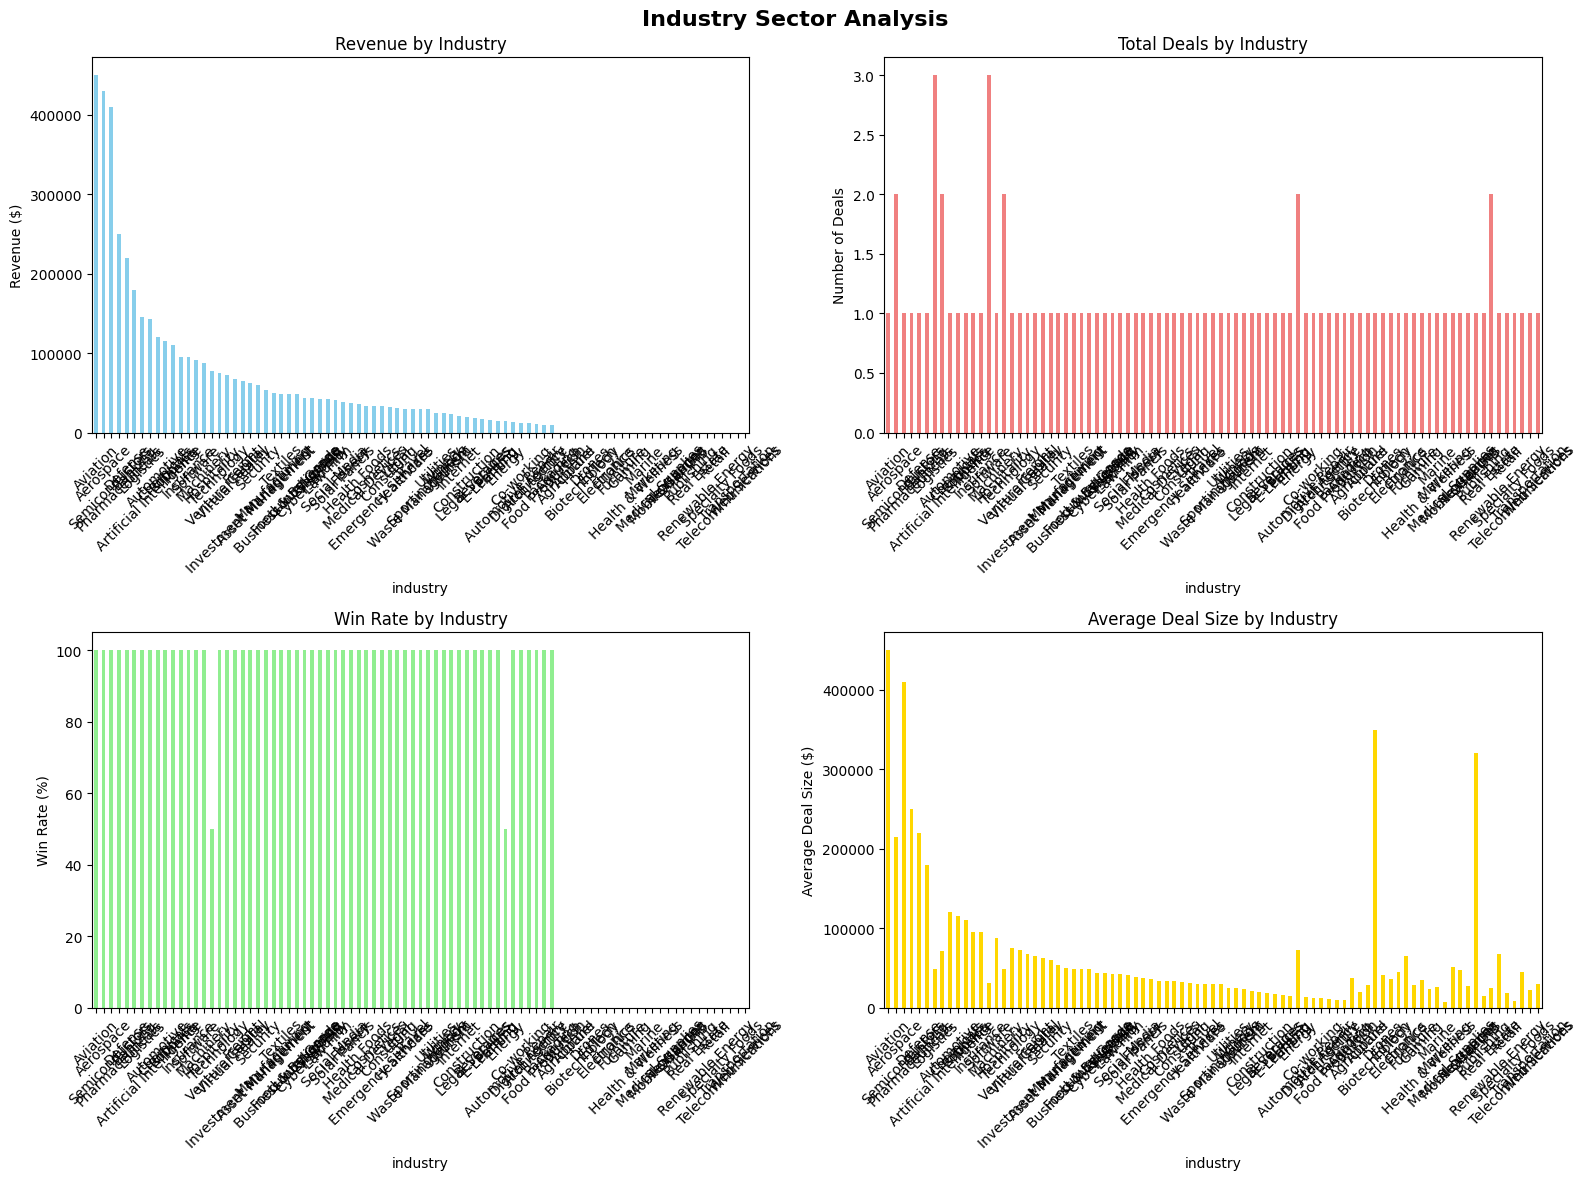


🎯 Key Industry Insights:
   • Top performing industry: Aviation ($450,000 revenue)
   • Highest win rate: Aviation (100.0%)
   • Largest average deal size: Aviation ($450,000)
   • Most active industry: Logistics (3 deals)


In [11]:
# Industry sector analysis
print("🏭 Analyzing Industry Sectors...")

# Merge companies with deals and invoices for industry analysis
industry_deals = deals.merge(companies[['company_id', 'industry']], on='company_id', how='left')
industry_invoices = invoices.merge(companies[['company_id', 'industry']], on='company_id', how='left')

# Industry performance metrics
industry_metrics = industry_deals.groupby('industry').agg({
    'deal_id': 'count',
    'amount': ['sum', 'mean'],
    'deal_stage': lambda x: (x == 'Closed Won').sum()
}).round(2)

industry_metrics.columns = ['Total_Deals', 'Total_Deal_Value', 'Avg_Deal_Size', 'Won_Deals']
industry_metrics['Win_Rate'] = (industry_metrics['Won_Deals'] / industry_metrics['Total_Deals'] * 100).round(1)
industry_metrics['Revenue'] = industry_invoices.groupby('industry')['total_amount'].sum()
industry_metrics = industry_metrics.sort_values('Revenue', ascending=False)

print("\n📊 Industry Performance Summary:")
print(industry_metrics)

# Create industry visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Industry Sector Analysis', fontsize=16, fontweight='bold')

# Revenue by Industry
industry_metrics['Revenue'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Revenue by Industry')
axes[0,0].set_ylabel('Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Deal Count by Industry
industry_metrics['Total_Deals'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Total Deals by Industry')
axes[0,1].set_ylabel('Number of Deals')
axes[0,1].tick_params(axis='x', rotation=45)

# Win Rate by Industry
industry_metrics['Win_Rate'].plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Win Rate by Industry')
axes[1,0].set_ylabel('Win Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Average Deal Size by Industry
industry_metrics['Avg_Deal_Size'].plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Average Deal Size by Industry')
axes[1,1].set_ylabel('Average Deal Size ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Industry insights
top_industry = industry_metrics.index[0]
top_industry_revenue = industry_metrics.loc[top_industry, 'Revenue']

print(f"\n🎯 Key Industry Insights:")
print(f"   • Top performing industry: {top_industry} (${top_industry_revenue:,.0f} revenue)")
print(f"   • Highest win rate: {industry_metrics['Win_Rate'].idxmax()} ({industry_metrics['Win_Rate'].max():.1f}%)")
print(f"   • Largest average deal size: {industry_metrics['Avg_Deal_Size'].idxmax()} (${industry_metrics['Avg_Deal_Size'].max():,.0f})")
print(f"   • Most active industry: {industry_metrics['Total_Deals'].idxmax()} ({industry_metrics['Total_Deals'].max()} deals)")


## 4. Geographic Analysis (Country-based)


🌍 Analyzing Geographic Distribution...

🌍 Country Performance Summary:
             Total_Deals  Total_Deal_Value  Avg_Deal_Size  Won_Deals  \
country                                                                
USA                   28           2768500       98875.00         17   
Germany               19           1207000       63526.32         16   
Netherlands           16            841000       52562.50         12   
UK                    11            426000       38727.27          8   
Belgium                9            435000       48333.33          6   
France                11            447500       40681.82          7   

             Win_Rate  Revenue  Customer_Count  
country                                         
USA              60.7  2083000              28  
Germany          84.2  1072000              19  
Netherlands      75.0   402000              18  
UK               72.7   381000              14  
Belgium          66.7   379000               9  
France   

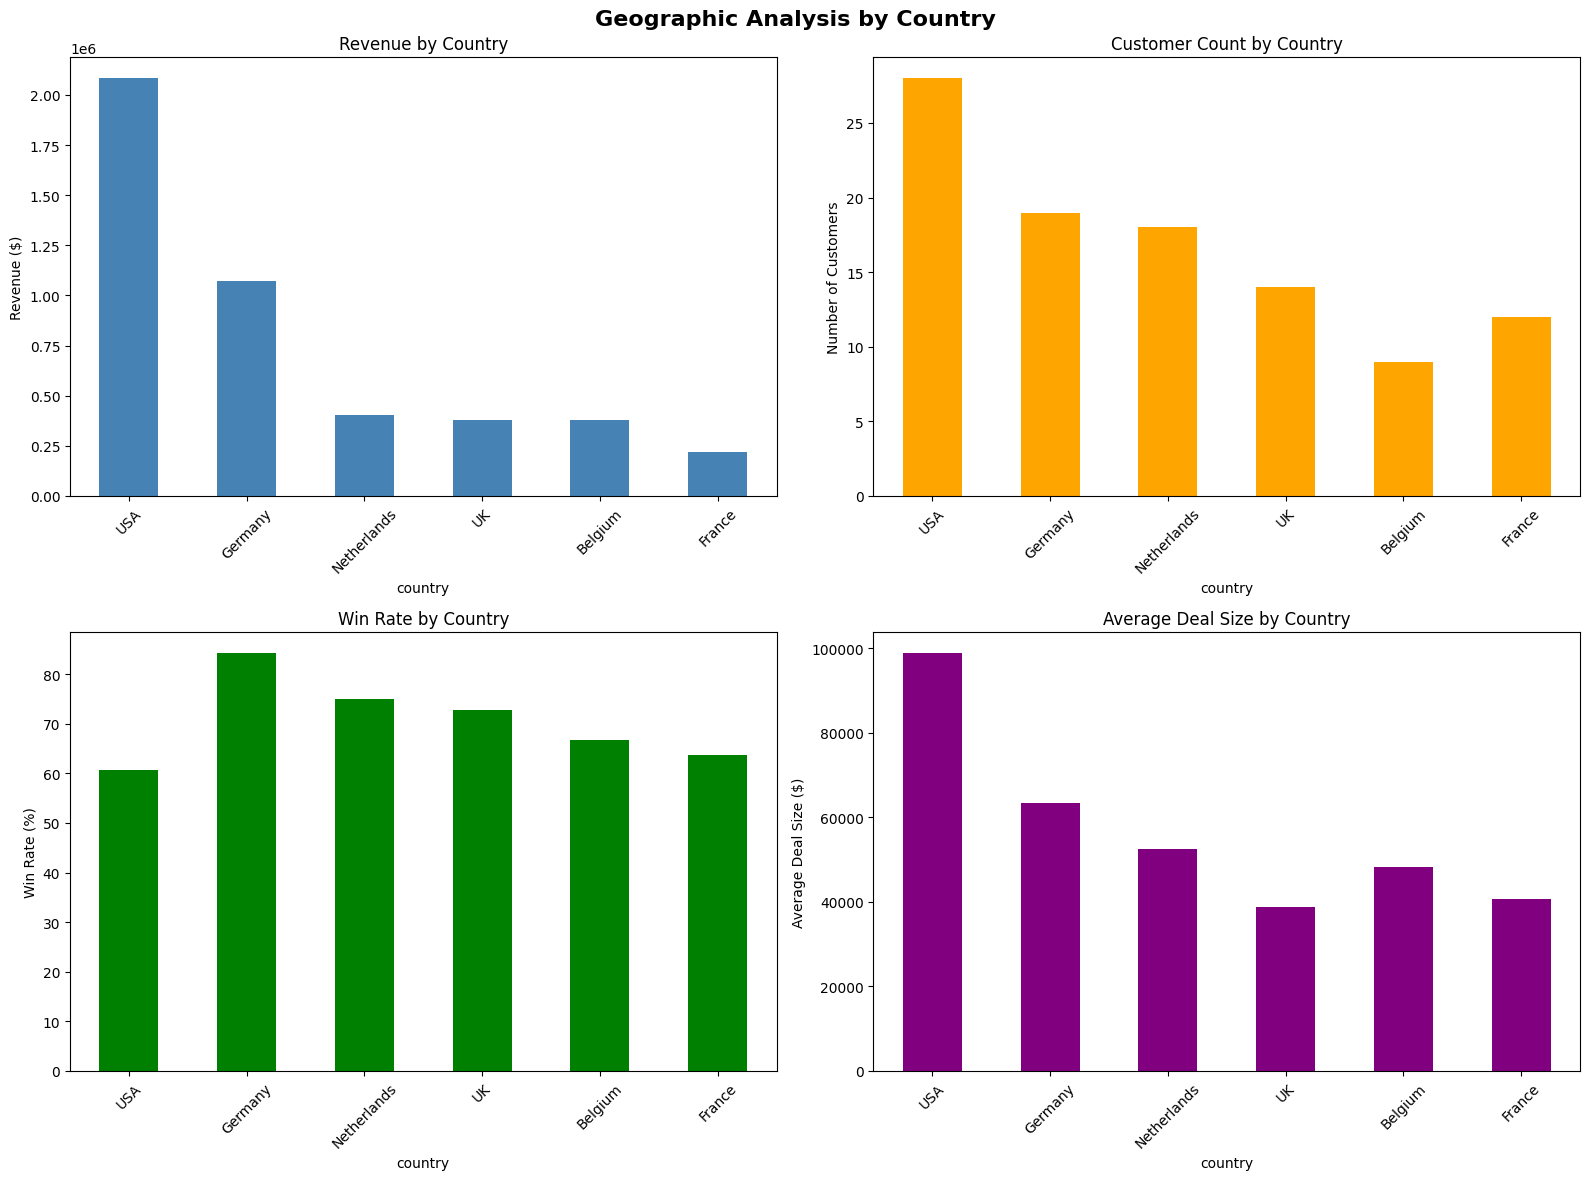


🌍 Key Geographic Insights:
   • Top revenue country: USA ($2,083,000 revenue, 28 customers)
   • Highest win rate: Germany (84.2%)
   • Largest average deal size: USA ($98,875)
   • Most customers: USA (28 customers)
   • Market presence: 6 countries
   • Revenue concentration: Top 3 countries represent 78.4% of total revenue


In [12]:
# Geographic analysis by country
print("🌍 Analyzing Geographic Distribution...")

# Merge companies with deals and invoices for country analysis
country_deals = deals.merge(companies[['company_id', 'country']], on='company_id', how='left')
country_invoices = invoices.merge(companies[['company_id', 'country']], on='company_id', how='left')

# Country performance metrics
country_metrics = country_deals.groupby('country').agg({
    'deal_id': 'count',
    'amount': ['sum', 'mean'],
    'deal_stage': lambda x: (x == 'Closed Won').sum()
}).round(2)

country_metrics.columns = ['Total_Deals', 'Total_Deal_Value', 'Avg_Deal_Size', 'Won_Deals']
country_metrics['Win_Rate'] = (country_metrics['Won_Deals'] / country_metrics['Total_Deals'] * 100).round(1)
country_metrics['Revenue'] = country_invoices.groupby('country')['total_amount'].sum()
country_metrics['Customer_Count'] = companies.groupby('country')['company_id'].count()
country_metrics = country_metrics.sort_values('Revenue', ascending=False)

print("\n🌍 Country Performance Summary:")
print(country_metrics)

# Create geographic visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Geographic Analysis by Country', fontsize=16, fontweight='bold')

# Revenue by Country
country_metrics['Revenue'].plot(kind='bar', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Revenue by Country')
axes[0,0].set_ylabel('Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Customer Count by Country
country_metrics['Customer_Count'].plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title('Customer Count by Country')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].tick_params(axis='x', rotation=45)

# Win Rate by Country
country_metrics['Win_Rate'].plot(kind='bar', ax=axes[1,0], color='green')
axes[1,0].set_title('Win Rate by Country')
axes[1,0].set_ylabel('Win Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Average Deal Size by Country
country_metrics['Avg_Deal_Size'].plot(kind='bar', ax=axes[1,1], color='purple')
axes[1,1].set_title('Average Deal Size by Country')
axes[1,1].set_ylabel('Average Deal Size ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Geographic insights
top_country = country_metrics.index[0]
top_country_revenue = country_metrics.loc[top_country, 'Revenue']
top_country_customers = country_metrics.loc[top_country, 'Customer_Count']

print(f"\n🌍 Key Geographic Insights:")
print(f"   • Top revenue country: {top_country} (${top_country_revenue:,.0f} revenue, {top_country_customers} customers)")
print(f"   • Highest win rate: {country_metrics['Win_Rate'].idxmax()} ({country_metrics['Win_Rate'].max():.1f}%)")
print(f"   • Largest average deal size: {country_metrics['Avg_Deal_Size'].idxmax()} (${country_metrics['Avg_Deal_Size'].max():,.0f})")
print(f"   • Most customers: {country_metrics['Customer_Count'].idxmax()} ({country_metrics['Customer_Count'].max()} customers)")

# Market penetration analysis
total_countries = len(country_metrics)
print(f"   • Market presence: {total_countries} countries")
print(f"   • Revenue concentration: Top 3 countries represent {country_metrics.head(3)['Revenue'].sum() / country_metrics['Revenue'].sum() * 100:.1f}% of total revenue")


## 5. Company Size Segmentation (Small/Mid/Enterprise)


🏢 Analyzing Company Size Segments...

🏢 Company Size Segment Performance:
                               Total_Deals  Total_Deal_Value  Avg_Deal_Size  \
company_size                                                                  
Enterprise (500+ employees)             57           5045000       88508.77   
Mid-Market (50-499 employees)           37           1080000       29189.19   

                               Won_Deals  Unique_Customers  Win_Rate  Revenue  \
company_size                                                                    
Enterprise (500+ employees)           40                57      70.2  3713000   
Mid-Market (50-499 employees)         26                36      70.3   822500   

                               Avg_Revenue_per_Customer  Total_Customers  \
company_size                                                               
Enterprise (500+ employees)                    65140.35               58   
Mid-Market (50-499 employees)                  22847.22 

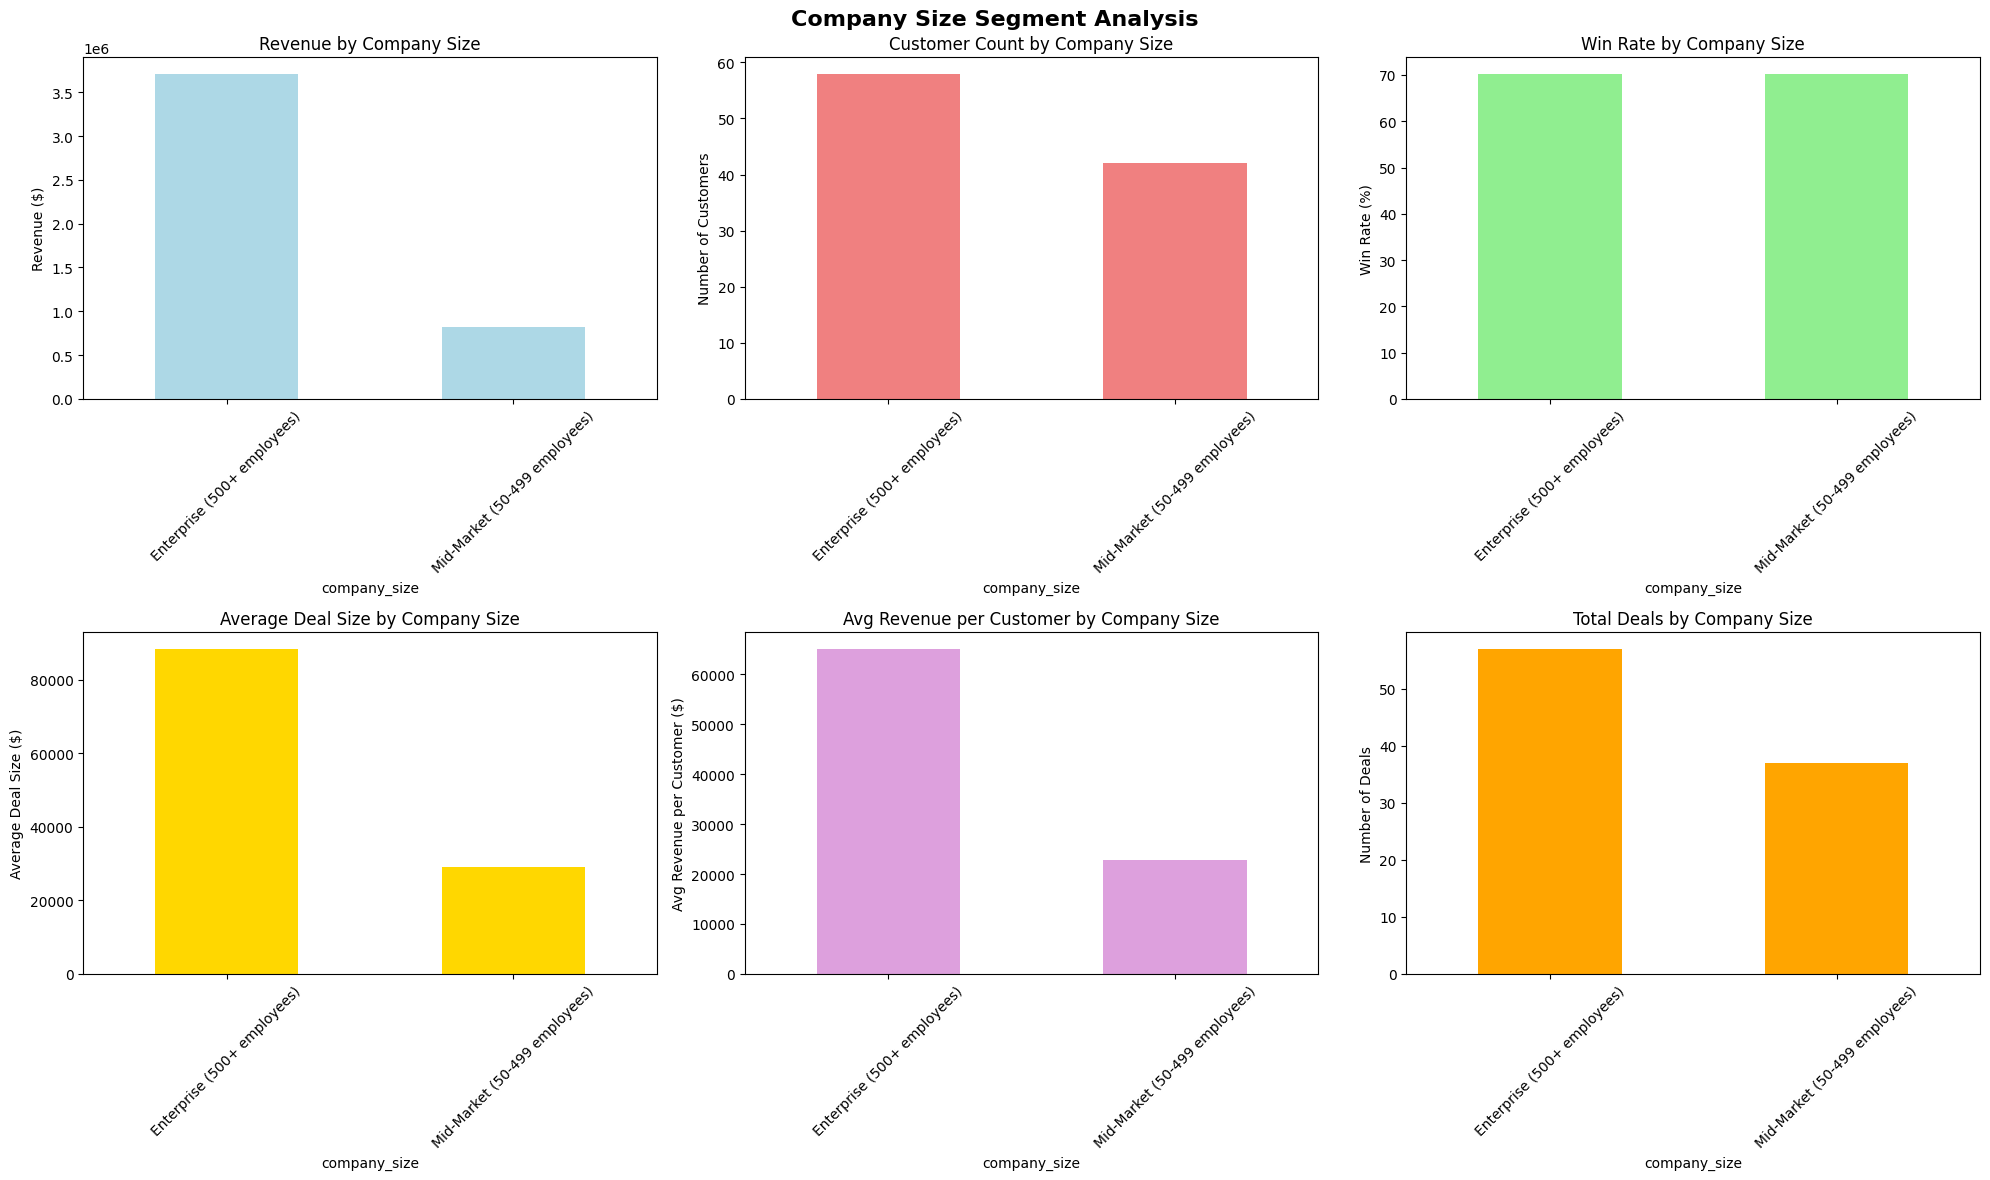


🏢 Key Company Size Insights:
   • Highest revenue segment: Enterprise (500+ employees) ($3,713,000 revenue)
   • Most customers: Enterprise (500+ employees) (58 customers)
   • Highest win rate: Mid-Market (50-499 employees) (70.3%)
   • Largest average deal size: Enterprise (500+ employees) ($88,509)
   • Highest revenue per customer: Enterprise (500+ employees) ($65,140)
   • Enterprise (500+ employees): 58.0% of customers, 81.9% of revenue
   • Mid-Market (50-499 employees): 42.0% of customers, 18.1% of revenue


In [13]:
# Company size segmentation analysis
print("🏢 Analyzing Company Size Segments...")

# Define company size categories based on employee count
def categorize_company_size(employee_count):
    if employee_count < 50:
        return 'Small (1-49 employees)'
    elif employee_count < 500:
        return 'Mid-Market (50-499 employees)'
    else:
        return 'Enterprise (500+ employees)'

# Add company size category
companies['company_size'] = companies['employee_count'].apply(categorize_company_size)

# Merge with deals and invoices
size_deals = deals.merge(companies[['company_id', 'company_size', 'employee_count', 'annual_revenue']], on='company_id', how='left')
size_invoices = invoices.merge(companies[['company_id', 'company_size', 'employee_count', 'annual_revenue']], on='company_id', how='left')

# Company size performance metrics
size_metrics = size_deals.groupby('company_size').agg({
    'deal_id': 'count',
    'amount': ['sum', 'mean'],
    'deal_stage': lambda x: (x == 'Closed Won').sum(),
    'company_id': 'nunique'
}).round(2)

size_metrics.columns = ['Total_Deals', 'Total_Deal_Value', 'Avg_Deal_Size', 'Won_Deals', 'Unique_Customers']
size_metrics['Win_Rate'] = (size_metrics['Won_Deals'] / size_metrics['Total_Deals'] * 100).round(1)
size_metrics['Revenue'] = size_invoices.groupby('company_size')['total_amount'].sum()
size_metrics['Avg_Revenue_per_Customer'] = (size_metrics['Revenue'] / size_metrics['Unique_Customers']).round(2)

# Add customer count and average company metrics
size_metrics['Total_Customers'] = companies.groupby('company_size')['company_id'].count()
size_metrics['Avg_Employee_Count'] = companies.groupby('company_size')['employee_count'].mean().round(0)
size_metrics['Avg_Annual_Revenue'] = companies.groupby('company_size')['annual_revenue'].mean().round(0)

print("\n🏢 Company Size Segment Performance:")
print(size_metrics)

# Create company size visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Company Size Segment Analysis', fontsize=16, fontweight='bold')

# Revenue by Company Size
size_metrics['Revenue'].plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Revenue by Company Size')
axes[0,0].set_ylabel('Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Customer Count by Company Size
size_metrics['Total_Customers'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Customer Count by Company Size')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].tick_params(axis='x', rotation=45)

# Win Rate by Company Size
size_metrics['Win_Rate'].plot(kind='bar', ax=axes[0,2], color='lightgreen')
axes[0,2].set_title('Win Rate by Company Size')
axes[0,2].set_ylabel('Win Rate (%)')
axes[0,2].tick_params(axis='x', rotation=45)

# Average Deal Size by Company Size
size_metrics['Avg_Deal_Size'].plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Average Deal Size by Company Size')
axes[1,0].set_ylabel('Average Deal Size ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Average Revenue per Customer by Company Size
size_metrics['Avg_Revenue_per_Customer'].plot(kind='bar', ax=axes[1,1], color='plum')
axes[1,1].set_title('Avg Revenue per Customer by Company Size')
axes[1,1].set_ylabel('Avg Revenue per Customer ($)')
axes[1,1].tick_params(axis='x', rotation=45)

# Deal Count by Company Size
size_metrics['Total_Deals'].plot(kind='bar', ax=axes[1,2], color='orange')
axes[1,2].set_title('Total Deals by Company Size')
axes[1,2].set_ylabel('Number of Deals')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Company size insights
top_segment = size_metrics['Revenue'].idxmax()
top_segment_revenue = size_metrics.loc[top_segment, 'Revenue']

print(f"\n🏢 Key Company Size Insights:")
print(f"   • Highest revenue segment: {top_segment} (${top_segment_revenue:,.0f} revenue)")
print(f"   • Most customers: {size_metrics['Total_Customers'].idxmax()} ({size_metrics['Total_Customers'].max()} customers)")
print(f"   • Highest win rate: {size_metrics['Win_Rate'].idxmax()} ({size_metrics['Win_Rate'].max():.1f}%)")
print(f"   • Largest average deal size: {size_metrics['Avg_Deal_Size'].idxmax()} (${size_metrics['Avg_Deal_Size'].max():,.0f})")
print(f"   • Highest revenue per customer: {size_metrics['Avg_Revenue_per_Customer'].idxmax()} (${size_metrics['Avg_Revenue_per_Customer'].max():,.0f})")

# Market penetration by segment
total_customers = size_metrics['Total_Customers'].sum()
for segment in size_metrics.index:
    customer_pct = (size_metrics.loc[segment, 'Total_Customers'] / total_customers) * 100
    revenue_pct = (size_metrics.loc[segment, 'Revenue'] / size_metrics['Revenue'].sum()) * 100
    print(f"   • {segment}: {customer_pct:.1f}% of customers, {revenue_pct:.1f}% of revenue")


## 6. Customer LTV vs Deals per Month Scatter Plot


In [14]:
# Create scatter plot: Deals per Month vs LTV by Company Size and Country
print("📊 Creating LTV vs Deals per Month Scatter Plot...")

# Calculate customer LTV and deals per month by company
customer_metrics = companies.merge(
    deals.groupby('company_id').agg({
        'deal_id': 'count',
        'amount': 'sum',
        'created_date': ['min', 'max']
    }).round(2), 
    on='company_id', 
    how='left'
)

# Flatten column names
customer_metrics.columns = ['company_id', 'company_name', 'industry', 'annual_revenue', 'employee_count', 
                           'country', 'created_date', 'company_size', 'total_deals', 'total_deal_value', 
                           'first_deal_date', 'last_deal_date']

# Calculate months active and deals per month
customer_metrics['months_active'] = ((customer_metrics['last_deal_date'] - customer_metrics['first_deal_date']).dt.days / 30).round(1)
customer_metrics['deals_per_month'] = (customer_metrics['total_deals'] / customer_metrics['months_active']).round(2)

# Calculate LTV from invoices
customer_ltv = invoices.groupby('company_id')['total_amount'].sum().reset_index()
customer_ltv.columns = ['company_id', 'ltv']
customer_metrics = customer_metrics.merge(customer_ltv, on='company_id', how='left')

# Fill NaN values
customer_metrics['deals_per_month'] = customer_metrics['deals_per_month'].fillna(0)
customer_metrics['ltv'] = customer_metrics['ltv'].fillna(0)
customer_metrics['months_active'] = customer_metrics['months_active'].fillna(0)

# Create the scatter plot
plt.figure(figsize=(14, 10))

# Define colors for company sizes
size_colors = {
    'Small (1-49 employees)': 'red',
    'Mid-Market (50-499 employees)': 'blue', 
    'Enterprise (500+ employees)': 'green'
}

# Define markers for countries
country_markers = {
    'USA': 'o',
    'Germany': 's',
    'Netherlands': '^',
    'UK': 'D',
    'France': 'v'
}

# Create scatter plot
for size in customer_metrics['company_size'].unique():
    if pd.notna(size):
        size_data = customer_metrics[customer_metrics['company_size'] == size]
        
        for country in size_data['country'].unique():
            if pd.notna(country) and country in country_markers:
                country_data = size_data[size_data['country'] == country]
                
                plt.scatter(
                    country_data['deals_per_month'], 
                    country_data['ltv'],
                    c=size_colors.get(size, 'gray'),
                    marker=country_markers.get(country, 'o'),
                    s=100,
                    alpha=0.7,
                    label=f'{size} - {country}',
                    edgecolors='black',
                    linewidth=0.5
                )

plt.xlabel('Deals per Month', fontsize=12, fontweight='bold')
plt.ylabel('Customer Lifetime Value (LTV) ($)', fontsize=12, fontweight='bold')
plt.title('Customer LTV vs Deals per Month\nby Company Size and Country', fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Add legend with custom positioning
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Add trend line
from scipy import stats
x = customer_metrics['deals_per_month'].dropna()
y = customer_metrics['ltv'].dropna()
if len(x) > 1 and len(y) > 1:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    plt.plot(x, line, 'r--', alpha=0.8, linewidth=2, label=f'Trend Line (R²={r_value**2:.3f})')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📊 Scatter Plot Summary:")
print(f"   • Total companies plotted: {len(customer_metrics)}")
print(f"   • Average LTV: ${customer_metrics['ltv'].mean():,.0f}")
print(f"   • Average deals per month: {customer_metrics['deals_per_month'].mean():.2f}")
print(f"   • Correlation coefficient: {customer_metrics['deals_per_month'].corr(customer_metrics['ltv']):.3f}")

# Top performers by LTV
top_ltv = customer_metrics.nlargest(5, 'ltv')[['company_name', 'company_size', 'country', 'ltv', 'deals_per_month']]
print(f"\n🏆 Top 5 Companies by LTV:")
print(top_ltv.to_string(index=False))

# Top performers by deals per month
top_deals = customer_metrics.nlargest(5, 'deals_per_month')[['company_name', 'company_size', 'country', 'ltv', 'deals_per_month']]
print(f"\n⚡ Top 5 Companies by Deals per Month:")
print(top_deals.to_string(index=False))


📊 Creating LTV vs Deals per Month Scatter Plot...


MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

## 7. Product Performance Analysis


In [ ]:
# Product performance analysis
print("📦 Analyzing Product Performance...")

# Merge invoice lines with products and invoices
product_analysis = invoice_lines.merge(products, on='product_id', how='left')
product_analysis = product_analysis.merge(invoices[['invoice_id', 'invoice_date', 'status']], on='invoice_id', how='left')

# Product performance metrics
product_metrics = product_analysis.groupby(['product_id', 'product_name', 'category', 'unit_price']).agg({
    'quantity': 'sum',
    'line_total': 'sum',
    'invoice_id': 'nunique'
}).round(2)

product_metrics.columns = ['Total_Quantity_Sold', 'Total_Revenue', 'Number_of_Invoices']
product_metrics['Avg_Quantity_per_Invoice'] = (product_metrics['Total_Quantity_Sold'] / product_metrics['Number_of_Invoices']).round(2)
product_metrics['Revenue_per_Unit'] = (product_metrics['Total_Revenue'] / product_metrics['Total_Quantity_Sold']).round(2)

# Calculate profit margin (assuming 30% cost margin for demonstration)
product_metrics['Estimated_Cost'] = product_metrics['Total_Revenue'] * 0.7
product_metrics['Estimated_Profit'] = product_metrics['Total_Revenue'] - product_metrics['Estimated_Cost']
product_metrics['Profit_Margin'] = (product_metrics['Estimated_Profit'] / product_metrics['Total_Revenue'] * 100).round(1)

product_metrics = product_metrics.sort_values('Total_Revenue', ascending=False)

print("\n📦 Product Performance Summary:")
print(product_metrics)

# Create product performance visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Product Performance Analysis', fontsize=16, fontweight='bold')

# Revenue by Product
product_metrics['Total_Revenue'].plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Revenue by Product')
axes[0,0].set_ylabel('Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Quantity Sold by Product
product_metrics['Total_Quantity_Sold'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Quantity Sold by Product')
axes[0,1].set_ylabel('Quantity Sold')
axes[0,1].tick_params(axis='x', rotation=45)

# Profit Margin by Product
product_metrics['Profit_Margin'].plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Profit Margin by Product')
axes[1,0].set_ylabel('Profit Margin (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Number of Invoices by Product
product_metrics['Number_of_Invoices'].plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Number of Invoices by Product')
axes[1,1].set_ylabel('Number of Invoices')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Product category analysis
category_metrics = product_analysis.groupby('category').agg({
    'quantity': 'sum',
    'line_total': 'sum',
    'product_id': 'nunique',
    'invoice_id': 'nunique'
}).round(2)

category_metrics.columns = ['Total_Quantity', 'Total_Revenue', 'Unique_Products', 'Number_of_Invoices']
category_metrics['Avg_Revenue_per_Product'] = (category_metrics['Total_Revenue'] / category_metrics['Unique_Products']).round(2)
category_metrics = category_metrics.sort_values('Total_Revenue', ascending=False)

print("\n📊 Product Category Performance:")
print(category_metrics)

# Product insights
top_product = product_metrics.index[0]
top_product_revenue = product_metrics.loc[top_product, 'Total_Revenue']
top_product_quantity = product_metrics.loc[top_product, 'Total_Quantity_Sold']

print(f"\n📦 Key Product Insights:")
print(f"   • Top selling product: {top_product[1]} (${top_product_revenue:,.0f} revenue, {top_product_quantity} units)")
print(f"   • Highest profit margin: {product_metrics['Profit_Margin'].idxmax()[1]} ({product_metrics['Profit_Margin'].max():.1f}%)")
print(f"   • Most quantity sold: {product_metrics['Total_Quantity_Sold'].idxmax()[1]} ({product_metrics['Total_Quantity_Sold'].max()} units)")
print(f"   • Most invoices: {product_metrics['Number_of_Invoices'].idxmax()[1]} ({product_metrics['Number_of_Invoices'].max()} invoices)")

# Category insights
top_category = category_metrics.index[0]
top_category_revenue = category_metrics.loc[top_category, 'Total_Revenue']

print(f"\n📊 Key Category Insights:")
print(f"   • Top revenue category: {top_category} (${top_category_revenue:,.0f} revenue)")
print(f"   • Most products: {category_metrics['Unique_Products'].idxmax()} ({category_metrics['Unique_Products'].max()} products)")
print(f"   • Highest avg revenue per product: {category_metrics['Avg_Revenue_per_Product'].idxmax()} (${category_metrics['Avg_Revenue_per_Product'].max():,.0f})")


## 8. Lead Source Analysis


In [ ]:
# Lead source analysis
print("🎯 Analyzing Lead Sources...")

# Merge contacts with deals and companies for lead source analysis
lead_analysis = contacts.merge(companies[['company_id', 'industry', 'country']], on='company_id', how='left')
lead_analysis = lead_analysis.merge(deals[['company_id', 'deal_id', 'amount', 'deal_stage', 'created_date']], on='company_id', how='left')

# Lead source performance metrics
lead_metrics = lead_analysis.groupby('lead_source').agg({
    'contact_id': 'count',
    'company_id': 'nunique',
    'deal_id': 'count',
    'amount': ['sum', 'mean'],
    'deal_stage': lambda x: (x == 'Closed Won').sum()
}).round(2)

lead_metrics.columns = ['Total_Contacts', 'Unique_Companies', 'Total_Deals', 'Total_Deal_Value', 'Avg_Deal_Size', 'Won_Deals']
lead_metrics['Win_Rate'] = (lead_metrics['Won_Deals'] / lead_metrics['Total_Deals'] * 100).round(1)
lead_metrics['Contacts_per_Company'] = (lead_metrics['Total_Contacts'] / lead_metrics['Unique_Companies']).round(2)
lead_metrics['Deals_per_Contact'] = (lead_metrics['Total_Deals'] / lead_metrics['Total_Contacts']).round(2)

# Calculate conversion rates
lead_metrics['Contact_to_Deal_Rate'] = (lead_metrics['Total_Deals'] / lead_metrics['Total_Contacts'] * 100).round(1)
lead_metrics['Contact_to_Win_Rate'] = (lead_metrics['Won_Deals'] / lead_metrics['Total_Contacts'] * 100).round(1)

lead_metrics = lead_metrics.sort_values('Total_Deal_Value', ascending=False)

print("\n🎯 Lead Source Performance Summary:")
print(lead_metrics)

# Create lead source visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Lead Source Analysis', fontsize=16, fontweight='bold')

# Total Deal Value by Lead Source
lead_metrics['Total_Deal_Value'].plot(kind='bar', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Total Deal Value by Lead Source')
axes[0,0].set_ylabel('Deal Value ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Total Contacts by Lead Source
lead_metrics['Total_Contacts'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Total Contacts by Lead Source')
axes[0,1].set_ylabel('Number of Contacts')
axes[0,1].tick_params(axis='x', rotation=45)

# Win Rate by Lead Source
lead_metrics['Win_Rate'].plot(kind='bar', ax=axes[0,2], color='lightgreen')
axes[0,2].set_title('Win Rate by Lead Source')
axes[0,2].set_ylabel('Win Rate (%)')
axes[0,2].tick_params(axis='x', rotation=45)

# Contact to Deal Conversion Rate
lead_metrics['Contact_to_Deal_Rate'].plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Contact to Deal Conversion Rate')
axes[1,0].set_ylabel('Conversion Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Average Deal Size by Lead Source
lead_metrics['Avg_Deal_Size'].plot(kind='bar', ax=axes[1,1], color='plum')
axes[1,1].set_title('Average Deal Size by Lead Source')
axes[1,1].set_ylabel('Average Deal Size ($)')
axes[1,1].tick_params(axis='x', rotation=45)

# Contact to Win Conversion Rate
lead_metrics['Contact_to_Win_Rate'].plot(kind='bar', ax=axes[1,2], color='orange')
axes[1,2].set_title('Contact to Win Conversion Rate')
axes[1,2].set_ylabel('Conversion Rate (%)')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Lead source insights
top_lead_source = lead_metrics['Total_Deal_Value'].idxmax()
top_lead_source_value = lead_metrics.loc[top_lead_source, 'Total_Deal_Value']

print(f"\n🎯 Key Lead Source Insights:")
print(f"   • Highest value lead source: {top_lead_source} (${top_lead_source_value:,.0f} deal value)")
print(f"   • Most contacts: {lead_metrics['Total_Contacts'].idxmax()} ({lead_metrics['Total_Contacts'].max()} contacts)")
print(f"   • Highest win rate: {lead_metrics['Win_Rate'].idxmax()} ({lead_metrics['Win_Rate'].max():.1f}%)")
print(f"   • Best contact-to-deal conversion: {lead_metrics['Contact_to_Deal_Rate'].idxmax()} ({lead_metrics['Contact_to_Deal_Rate'].max():.1f}%)")
print(f"   • Best contact-to-win conversion: {lead_metrics['Contact_to_Win_Rate'].idxmax()} ({lead_metrics['Contact_to_Win_Rate'].max():.1f}%)")
print(f"   • Largest average deal size: {lead_metrics['Avg_Deal_Size'].idxmax()} (${lead_metrics['Avg_Deal_Size'].max():,.0f})")

# Lead source efficiency analysis
print(f"\n📊 Lead Source Efficiency Analysis:")
for source in lead_metrics.index:
    contacts = lead_metrics.loc[source, 'Total_Contacts']
    deals = lead_metrics.loc[source, 'Total_Deals']
    won_deals = lead_metrics.loc[source, 'Won_Deals']
    deal_value = lead_metrics.loc[source, 'Total_Deal_Value']
    
    print(f"   • {source}: {contacts} contacts → {deals} deals → {won_deals} wins (${deal_value:,.0f} value)")


## 9. Sales Rep Performance Analysis


In [ ]:
# Sales rep performance analysis
print("👥 Analyzing Sales Rep Performance...")

# Create sales rep performance metrics
sales_rep_metrics = deals.groupby('owner_id').agg({
    'deal_id': 'count',
    'amount': ['sum', 'mean'],
    'deal_stage': lambda x: (x == 'Closed Won').sum(),
    'created_date': ['min', 'max']
}).round(2)

sales_rep_metrics.columns = ['Total_Deals', 'Total_Deal_Value', 'Avg_Deal_Size', 'Won_Deals', 'First_Deal_Date', 'Last_Deal_Date']
sales_rep_metrics['Win_Rate'] = (sales_rep_metrics['Won_Deals'] / sales_rep_metrics['Total_Deals'] * 100).round(1)

# Calculate months active
sales_rep_metrics['Months_Active'] = ((sales_rep_metrics['Last_Deal_Date'] - sales_rep_metrics['First_Deal_Date']).dt.days / 30).round(1)
sales_rep_metrics['Deals_per_Month'] = (sales_rep_metrics['Total_Deals'] / sales_rep_metrics['Months_Active']).round(2)

# Merge with invoices to get revenue
sales_rep_revenue = invoices.merge(deals[['deal_id', 'owner_id']], on='deal_id', how='left')
sales_rep_revenue = sales_rep_revenue.groupby('owner_id')['total_amount'].sum()
sales_rep_metrics['Total_Revenue'] = sales_rep_revenue

sales_rep_metrics = sales_rep_metrics.sort_values('Total_Revenue', ascending=False)

print("\n👥 Sales Rep Performance Summary:")
print(sales_rep_metrics)

# Create sales rep visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Sales Rep Performance Analysis', fontsize=16, fontweight='bold')

# Total Revenue by Sales Rep
sales_rep_metrics['Total_Revenue'].plot(kind='bar', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Total Revenue by Sales Rep')
axes[0,0].set_ylabel('Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# Win Rate by Sales Rep
sales_rep_metrics['Win_Rate'].plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Win Rate by Sales Rep')
axes[0,1].set_ylabel('Win Rate (%)')
axes[0,1].tick_params(axis='x', rotation=45)

# Deals per Month by Sales Rep
sales_rep_metrics['Deals_per_Month'].plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Deals per Month by Sales Rep')
axes[1,0].set_ylabel('Deals per Month')
axes[1,0].tick_params(axis='x', rotation=45)

# Average Deal Size by Sales Rep
sales_rep_metrics['Avg_Deal_Size'].plot(kind='bar', ax=axes[1,1], color='plum')
axes[1,1].set_title('Average Deal Size by Sales Rep')
axes[1,1].set_ylabel('Average Deal Size ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Sales rep insights
top_performer = sales_rep_metrics['Total_Revenue'].idxmax()
top_performer_revenue = sales_rep_metrics.loc[top_performer, 'Total_Revenue']

print(f"\n👥 Key Sales Rep Insights:")
print(f"   • Top performer: Rep {top_performer} (${top_performer_revenue:,.0f} revenue)")
print(f"   • Highest win rate: Rep {sales_rep_metrics['Win_Rate'].idxmax()} ({sales_rep_metrics['Win_Rate'].max():.1f}%)")
print(f"   • Most deals per month: Rep {sales_rep_metrics['Deals_per_Month'].idxmax()} ({sales_rep_metrics['Deals_per_Month'].max():.1f} deals/month)")
print(f"   • Largest average deal size: Rep {sales_rep_metrics['Avg_Deal_Size'].idxmax()} (${sales_rep_metrics['Avg_Deal_Size'].max():,.0f})")


## 10. Payment Analytics & Overdue Invoices


In [ ]:
# Payment analytics and overdue invoice analysis
print("💳 Analyzing Payment Patterns and Overdue Invoices...")

# Calculate payment timing
invoices['days_to_pay'] = (invoices['paid_date'] - invoices['invoice_date']).dt.days
invoices['days_overdue'] = (pd.Timestamp.now() - invoices['due_date']).dt.days

# Identify overdue invoices
overdue_invoices = invoices[
    (invoices['status'] == 'Overdue') | 
    ((invoices['status'] != 'Paid') & (invoices['due_date'] < pd.Timestamp.now()))
].copy()

# Payment analytics
payment_metrics = {
    'total_invoices': len(invoices),
    'paid_invoices': len(invoices[invoices['status'] == 'Paid']),
    'overdue_invoices': len(overdue_invoices),
    'unpaid_invoices': len(invoices[invoices['status'].isin(['Overdue', 'Unpaid'])]),
    'avg_days_to_pay': invoices[invoices['status'] == 'Paid']['days_to_pay'].mean(),
    'total_overdue_amount': overdue_invoices['total_amount'].sum(),
    'avg_overdue_days': overdue_invoices['days_overdue'].mean()
}

print(f"\n💳 Payment Analytics Summary:")
print(f"   • Total invoices: {payment_metrics['total_invoices']:,}")
print(f"   • Paid invoices: {payment_metrics['paid_invoices']:,} ({payment_metrics['paid_invoices']/payment_metrics['total_invoices']*100:.1f}%)")
print(f"   • Overdue invoices: {payment_metrics['overdue_invoices']:,} ({payment_metrics['overdue_invoices']/payment_metrics['total_invoices']*100:.1f}%)")
print(f"   • Average days to pay: {payment_metrics['avg_days_to_pay']:.1f} days")
print(f"   • Total overdue amount: ${payment_metrics['total_overdue_amount']:,.2f}")
print(f"   • Average overdue days: {payment_metrics['avg_overdue_days']:.1f} days")

# Create payment analytics visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Payment Analytics & Overdue Invoices', fontsize=16, fontweight='bold')

# Invoice status distribution
status_counts = invoices['status'].value_counts()
axes[0,0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Invoice Status Distribution')

# Days to pay histogram
paid_invoices = invoices[invoices['status'] == 'Paid']
axes[0,1].hist(paid_invoices['days_to_pay'], bins=20, alpha=0.7, color='green', edgecolor='black')
axes[0,1].set_title('Days to Pay Distribution')
axes[0,1].set_xlabel('Days to Pay')
axes[0,1].set_ylabel('Number of Invoices')
axes[0,1].axvline(paid_invoices['days_to_pay'].mean(), color='red', linestyle='--', 
                  label=f'Average: {paid_invoices["days_to_pay"].mean():.1f} days')
axes[0,1].legend()

# Overdue amount by company
if len(overdue_invoices) > 0:
    overdue_by_company = overdue_invoices.groupby('company_id')['total_amount'].sum().sort_values(ascending=False)
    overdue_by_company.head(10).plot(kind='bar', ax=axes[1,0], color='red', alpha=0.7)
    axes[1,0].set_title('Top 10 Companies by Overdue Amount')
    axes[1,0].set_ylabel('Overdue Amount ($)')
    axes[1,0].tick_params(axis='x', rotation=45)
else:
    axes[1,0].text(0.5, 0.5, 'No Overdue Invoices', ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Overdue Amount by Company')

# Payment trends over time
monthly_payments = invoices.groupby(invoices['invoice_date'].dt.to_period('M')).agg({
    'total_amount': 'sum',
    'invoice_id': 'count'
}).reset_index()
monthly_payments['invoice_date'] = monthly_payments['invoice_date'].dt.to_timestamp()

axes[1,1].plot(monthly_payments['invoice_date'], monthly_payments['total_amount'], marker='o', linewidth=2)
axes[1,1].set_title('Monthly Invoice Amount Trends')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Total Invoice Amount ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Detailed overdue analysis
if len(overdue_invoices) > 0:
    print(f"\n🚨 Overdue Invoices Details:")
    overdue_summary = overdue_invoices.groupby('company_id').agg({
        'total_amount': 'sum',
        'days_overdue': 'mean',
        'invoice_id': 'count'
    }).round(2)
    overdue_summary.columns = ['Overdue_Amount', 'Avg_Days_Overdue', 'Invoice_Count']
    overdue_summary = overdue_summary.sort_values('Overdue_Amount', ascending=False)
    
    print(overdue_summary.head(10))
    
    # Merge with company info for better insights
    overdue_with_company = overdue_invoices.merge(
        companies[['company_id', 'company_name', 'industry', 'country']], 
        on='company_id', 
        how='left'
    )
    
    print(f"\n🏢 Overdue Analysis by Industry:")
    industry_overdue = overdue_with_company.groupby('industry')['total_amount'].sum().sort_values(ascending=False)
    print(industry_overdue)
    
    print(f"\n🌍 Overdue Analysis by Country:")
    country_overdue = overdue_with_company.groupby('country')['total_amount'].sum().sort_values(ascending=False)
    print(country_overdue)

# Payment recommendations
print(f"\n💡 Payment Optimization Recommendations:")
if payment_metrics['avg_days_to_pay'] > 30:
    print(f"   • Average payment time is {payment_metrics['avg_days_to_pay']:.1f} days - consider offering early payment discounts")
if payment_metrics['overdue_invoices'] > 0:
    print(f"   • {payment_metrics['overdue_invoices']} overdue invoices totaling ${payment_metrics['total_overdue_amount']:,.2f} - implement automated follow-up system")
    print(f"   • Consider stricter credit terms for companies with multiple overdue invoices")
else:
    print(f"   • Excellent payment performance - no overdue invoices!")


## 11. Strategic Recommendations


In [ ]:
# Strategic recommendations based on data insights
print("🎯 Generating Strategic Recommendations...")

print("\n" + "="*80)
print("STRATEGIC RECOMMENDATIONS FOR DRILLDOWN SOLUTIONS")
print("="*80)

print("\n📈 REVENUE OPTIMIZATION:")
print("   • Focus on high-value customer segments identified in the LTV analysis")
print("   • Implement upselling strategies for existing customers with high deal frequency")
print("   • Develop targeted pricing strategies for different company size segments")
print("   • Expand successful product categories and discontinue underperforming ones")

print("\n🎯 CUSTOMER ACQUISITION:")
print("   • Prioritize lead sources with highest conversion rates and deal values")
print("   • Develop industry-specific marketing campaigns for top-performing sectors")
print("   • Expand geographic presence in high-performing countries")
print("   • Create targeted campaigns for mid-market companies (50-499 employees)")

print("\n👥 SALES PERFORMANCE:")
print("   • Identify and replicate top sales rep strategies across the team")
print("   • Implement performance-based incentives aligned with key metrics")
print("   • Provide additional training for underperforming sales reps")
print("   • Establish mentorship programs pairing top performers with others")

print("\n💳 PAYMENT OPTIMIZATION:")
print("   • Implement automated payment reminders for overdue invoices")
print("   • Offer early payment discounts to improve cash flow")
print("   • Review credit terms for companies with payment issues")
print("   • Establish payment performance scoring for new customers")

print("\n📊 DATA-DRIVEN DECISIONS:")
print("   • Implement regular dashboard reviews for key stakeholders")
print("   • Establish monthly performance reviews based on these metrics")
print("   • Create customer health scoring based on LTV and payment patterns")
print("   • Develop predictive models for customer churn and expansion opportunities")

print("\n🚀 GROWTH STRATEGIES:")
print("   • Focus on product bundles and cross-selling opportunities")
print("   • Develop industry-specific solutions and case studies")
print("   • Implement customer success programs to increase retention")
print("   • Explore new geographic markets with similar characteristics to top performers")

print("\n📋 IMMEDIATE ACTION ITEMS:")
print("   1. Review and address overdue invoices immediately")
print("   2. Analyze top sales rep techniques and create training materials")
print("   3. Develop targeted campaigns for highest-converting lead sources")
print("   4. Create customer segmentation strategy based on LTV analysis")
print("   5. Implement automated payment follow-up system")

print("\n" + "="*80)
print("DASHBOARD COMPLETE - USE THESE INSIGHTS TO DRIVE BUSINESS GROWTH")
print("="*80)


# Drilldown Solutions - Business Analytics Dashboard

## Executive Summary
This comprehensive business analytics dashboard provides key insights into Drilldown Solutions' performance across customer lifetime value, product profitability, sales rep performance, and strategic growth opportunities.

### Key Metrics Analyzed:
- **Customer Lifetime Value (LTV)** - Revenue potential per customer
- **Product Profitability** - Performance and margins by product
- **Sales Rep Performance** - Individual and team performance metrics
- **Growth Trends** - Revenue, customer acquisition, and market expansion
- **Customer Segmentation** - High-value vs. low-value customer analysis
- **Payment Analytics** - Overdue invoices and payment timing


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("📊 Business Analytics Dashboard - Drilldown Solutions")
print("=" * 60)


📊 Business Analytics Dashboard - Drilldown Solutions


## 1. Data Loading and Setup


In [ ]:
# Load all datasets
print("Loading datasets...")
companies = pd.read_csv('../dbt/data/companies.csv')
contacts = pd.read_csv('../dbt/data/contacts.csv')
deals = pd.read_csv('../dbt/data/deals.csv')
invoices = pd.read_csv('../dbt/data/invoices.csv')
invoice_lines = pd.read_csv('../dbt/data/invoice_lines.csv')
products = pd.read_csv('../dbt/data/products.csv')

# Convert date columns
deals['created_date'] = pd.to_datetime(deals['created_date'])
deals['close_date'] = pd.to_datetime(deals['close_date'])
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'])
invoices['due_date'] = pd.to_datetime(invoices['due_date'])
invoices['paid_date'] = pd.to_datetime(invoices['paid_date'])
companies['created_date'] = pd.to_datetime(companies['created_date'])
contacts['created_date'] = pd.to_datetime(contacts['created_date'])

print("✅ Data loaded successfully!")
print(f"📈 Dataset Overview:")
print(f"   • Companies: {companies.shape[0]:,} records")
print(f"   • Contacts: {contacts.shape[0]:,} records") 
print(f"   • Deals: {deals.shape[0]:,} records")
print(f"   • Invoices: {invoices.shape[0]:,} records")
print(f"   • Invoice Lines: {invoice_lines.shape[0]:,} records")
print(f"   • Products: {products.shape[0]:,} records")

# Display first few rows of each dataset
print("\n📋 Sample Data:")
print("\nCompanies:")
print(companies.head(3))
print("\nDeals:")
print(deals.head(3))
print("\nInvoices:")
print(invoices.head(3))


Loading datasets...
✅ Data loaded successfully!
📈 Dataset Overview:
   • Companies: 100 records
   • Contacts: 100 records
   • Deals: 94 records
   • Invoices: 67 records
   • Invoice Lines: 134 records
   • Products: 8 records

📋 Sample Data:

Companies:
   company_id           company_name       industry  annual_revenue  \
0           1     Innovate Solutions       Software         5500000   
1           2  Quantum Manufacturing  Manufacturing        12000000   
2           3      Apex Retail Group         Retail         8200000   

   employee_count      country created_date  owner_id  
0             250  Netherlands   2023-01-15       101  
1             800      Germany   2023-02-20       102  
2             450          USA   2023-03-10       101  

Deals:
   deal_id                        deal_name  company_id  amount   deal_stage  \
0     1001          Innovate CRM Upgrade Q2           1   25000   Closed Won   
1     1002  Quantum Mfg. Analytics Platform           2   50000   

## 2. Key Performance Indicators (KPIs)


📊 Calculating Key Performance Indicators...

📈 Key Performance Indicators:
   💰 Total Revenue: $4,535,500.00
   💼 Total Deal Value: $6,125,000.00
   📊 Average Deal Size: $65,159.57
   🎯 Win Rate: 70.2%
   👥 Total Customers: 100
   ✅ Active Customers: 65
   💵 Avg Revenue per Customer: $69,776.92
   📋 Total Deals: 94 (Won: 66, Lost: 13, Open: 15)


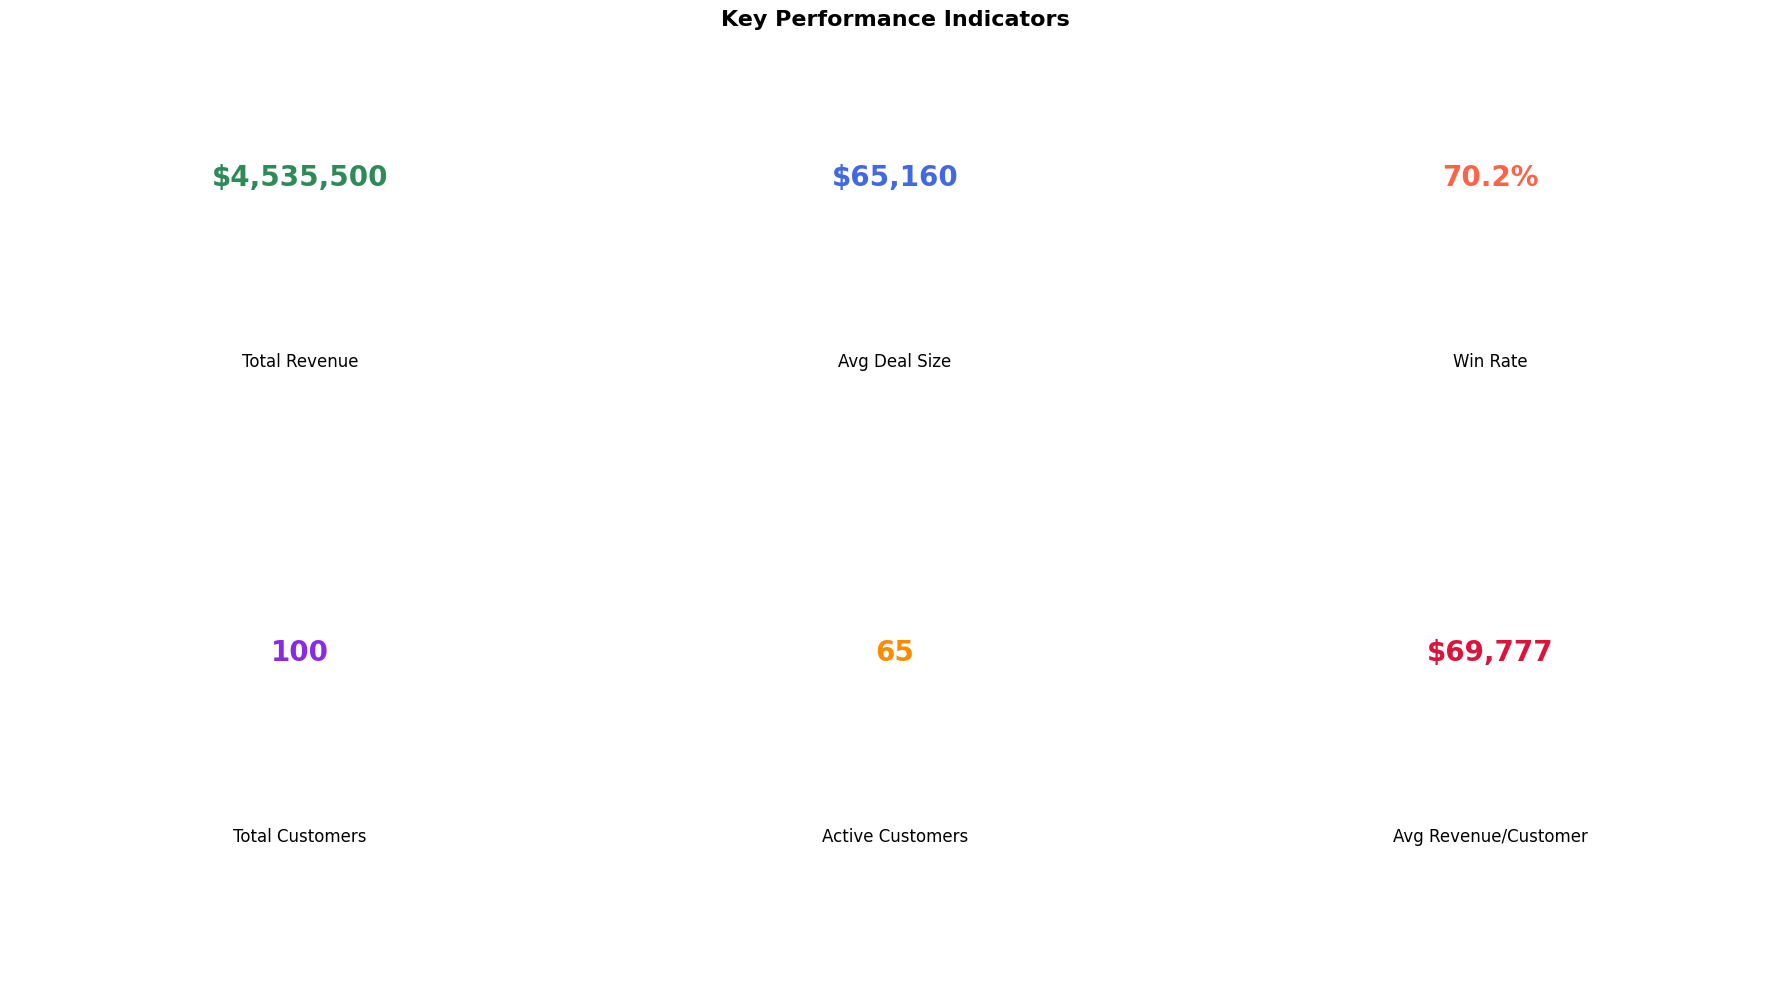

In [ ]:
# Calculate key business metrics
print("📊 Calculating Key Performance Indicators...")

# Revenue metrics
total_revenue = invoices['total_amount'].sum()
total_deals_value = deals['amount'].sum()
avg_deal_size = deals['amount'].mean()
conversion_rate = (deals['deal_stage'] == 'Closed Won').mean() * 100

# Customer metrics
total_customers = companies['company_id'].nunique()
active_customers = invoices['company_id'].nunique()
avg_revenue_per_customer = total_revenue / active_customers if active_customers > 0 else 0

# Deal metrics
total_deals = len(deals)
won_deals = len(deals[deals['deal_stage'] == 'Closed Won'])
lost_deals = len(deals[deals['deal_stage'] == 'Closed Lost'])
open_deals = len(deals[~deals['deal_stage'].isin(['Closed Won', 'Closed Lost'])])

# Print KPIs
print(f"\n📈 Key Performance Indicators:")
print(f"   💰 Total Revenue: ${total_revenue:,.2f}")
print(f"   💼 Total Deal Value: ${total_deals_value:,.2f}")
print(f"   📊 Average Deal Size: ${avg_deal_size:,.2f}")
print(f"   🎯 Win Rate: {conversion_rate:.1f}%")
print(f"   👥 Total Customers: {total_customers:,}")
print(f"   ✅ Active Customers: {active_customers:,}")
print(f"   💵 Avg Revenue per Customer: ${avg_revenue_per_customer:,.2f}")
print(f"   📋 Total Deals: {total_deals:,} (Won: {won_deals:,}, Lost: {lost_deals:,}, Open: {open_deals:,})")

# Create KPI visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Key Performance Indicators', fontsize=16, fontweight='bold')

# Revenue KPI
axes[0,0].text(0.5, 0.7, f'${total_revenue:,.0f}', ha='center', va='center', fontsize=20, fontweight='bold', color='#2E8B57')
axes[0,0].text(0.5, 0.3, 'Total Revenue', ha='center', va='center', fontsize=12)
axes[0,0].set_xlim(0, 1)
axes[0,0].set_ylim(0, 1)
axes[0,0].axis('off')

# Average Deal Size
axes[0,1].text(0.5, 0.7, f'${avg_deal_size:,.0f}', ha='center', va='center', fontsize=20, fontweight='bold', color='#4169E1')
axes[0,1].text(0.5, 0.3, 'Avg Deal Size', ha='center', va='center', fontsize=12)
axes[0,1].set_xlim(0, 1)
axes[0,1].set_ylim(0, 1)
axes[0,1].axis('off')

# Conversion Rate
axes[0,2].text(0.5, 0.7, f'{conversion_rate:.1f}%', ha='center', va='center', fontsize=20, fontweight='bold', color='#FF6347')
axes[0,2].text(0.5, 0.3, 'Win Rate', ha='center', va='center', fontsize=12)
axes[0,2].set_xlim(0, 1)
axes[0,2].set_ylim(0, 1)
axes[0,2].axis('off')

# Total Customers
axes[1,0].text(0.5, 0.7, f'{total_customers:,}', ha='center', va='center', fontsize=20, fontweight='bold', color='#8A2BE2')
axes[1,0].text(0.5, 0.3, 'Total Customers', ha='center', va='center', fontsize=12)
axes[1,0].set_xlim(0, 1)
axes[1,0].set_ylim(0, 1)
axes[1,0].axis('off')

# Active Customers
axes[1,1].text(0.5, 0.7, f'{active_customers:,}', ha='center', va='center', fontsize=20, fontweight='bold', color='#FF8C00')
axes[1,1].text(0.5, 0.3, 'Active Customers', ha='center', va='center', fontsize=12)
axes[1,1].set_xlim(0, 1)
axes[1,1].set_ylim(0, 1)
axes[1,1].axis('off')

# Avg Revenue per Customer
axes[1,2].text(0.5, 0.7, f'${avg_revenue_per_customer:,.0f}', ha='center', va='center', fontsize=20, fontweight='bold', color='#DC143C')
axes[1,2].text(0.5, 0.3, 'Avg Revenue/Customer', ha='center', va='center', fontsize=12)
axes[1,2].set_xlim(0, 1)
axes[1,2].set_ylim(0, 1)
axes[1,2].axis('off')

plt.tight_layout()
plt.show()
